In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [2]:
balls=pd.read_csv("C:/Users/91956/Dropbox/PC/Downloads/ipl/IPL_Ball_by_Ball_2008_2022.csv")
matches=pd.read_csv("C:/Users/91956/Dropbox/PC/Downloads/ipl/IPL_Matches_2008_2022.csv")

In [3]:
balls.shape

(225954, 17)

In [4]:
matches.shape

(950, 20)

In [5]:
matches.head()

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2
0,1312200,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,N,Gujarat Titans,Wickets,7.0,NaN,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon
1,1312199,Ahmedabad,2022-05-27,2022,Qualifier 2,Royal Challengers Bangalore,Rajasthan Royals,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,field,N,Rajasthan Royals,Wickets,7.0,NaN,JC Buttler,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...",CB Gaffaney,Nitin Menon
2,1312198,Kolkata,2022-05-25,2022,Eliminator,Royal Challengers Bangalore,Lucknow Super Giants,"Eden Gardens, Kolkata",Lucknow Super Giants,field,N,Royal Challengers Bangalore,Runs,14.0,NaN,RM Patidar,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['Q de Kock', 'KL Rahul', 'M Vohra', 'DJ Hooda...",J Madanagopal,MA Gough
3,1312197,Kolkata,2022-05-24,2022,Qualifier 1,Rajasthan Royals,Gujarat Titans,"Eden Gardens, Kolkata",Gujarat Titans,field,N,Gujarat Titans,Wickets,7.0,NaN,DA Miller,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",BNJ Oxenford,VK Sharma
4,1304116,Mumbai,2022-05-22,2022,70,Sunrisers Hyderabad,Punjab Kings,"Wankhede Stadium, Mumbai",Sunrisers Hyderabad,bat,N,Punjab Kings,Wickets,5.0,NaN,Harpreet Brar,"['PK Garg', 'Abhishek Sharma', 'RA Tripathi', ...","['JM Bairstow', 'S Dhawan', 'M Shahrukh Khan',...",AK Chaudhary,NA Patwardhan


In [6]:
balls.head()

,ID,innings,overs,ballnumber,batter,bowler,non-striker,extra_type,batsman_run,extras_run,total_run,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam
0,1312200,1,0,1,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
1,1312200,1,0,2,YBK Jaiswal,Mohammed Shami,JC Buttler,legbyes,0,1,1,0,0,NaN,NaN,NaN,Rajasthan Royals
2,1312200,1,0,3,JC Buttler,Mohammed Shami,YBK Jaiswal,NaN,1,0,1,0,0,NaN,NaN,NaN,Rajasthan Royals
3,1312200,1,0,4,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
4,1312200,1,0,5,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals


In [7]:
total_score=balls.groupby(['ID','innings']).sum()['total_run'].reset_index()

In [8]:
total_score

,ID,innings,total_run
0,335982,1,222
1,335982,2,82
2,335983,1,240
3,335983,2,207
4,335984,1,129
...,...,...,...
1923,1312198,2,193
1924,1312199,1,157
1925,1312199,2,161
1926,1312200,1,130


In [9]:
total_score=total_score[total_score['innings']==1]

In [10]:
total_score.head()

,ID,innings,total_run
0,335982,1,222
2,335983,1,240
4,335984,1,129
6,335985,1,165
8,335986,1,110


In [11]:
match_df=matches.merge(total_score[['ID','total_run']])

In [12]:
match_df

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,...,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2,total_run
0,1312200,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,...,Gujarat Titans,Wickets,7.0,NaN,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon,130
1,1312199,Ahmedabad,2022-05-27,2022,Qualifier 2,Royal Challengers Bangalore,Rajasthan Royals,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,field,...,Rajasthan Royals,Wickets,7.0,NaN,JC Buttler,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...",CB Gaffaney,Nitin Menon,157
2,1312198,Kolkata,2022-05-25,2022,Eliminator,Royal Challengers Bangalore,Lucknow Super Giants,"Eden Gardens, Kolkata",Lucknow Super Giants,field,...,Royal Challengers Bangalore,Runs,14.0,NaN,RM Patidar,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['Q de Kock', 'KL Rahul', 'M Vohra', 'DJ Hooda...",J Madanagopal,MA Gough,207
3,1312197,Kolkata,2022-05-24,2022,Qualifier 1,Rajasthan Royals,Gujarat Titans,"Eden Gardens, Kolkata",Gujarat Titans,field,...,Gujarat Titans,Wickets,7.0,NaN,DA Miller,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",BNJ Oxenford,VK Sharma,188
4,1304116,Mumbai,2022-05-22,2022,70,Sunrisers Hyderabad,Punjab Kings,"Wankhede Stadium, Mumbai",Sunrisers Hyderabad,bat,...,Punjab Kings,Wickets,5.0,NaN,Harpreet Brar,"['PK Garg', 'Abhishek Sharma', 'RA Tripathi', ...","['JM Bairstow', 'S Dhawan', 'M Shahrukh Khan',...",AK Chaudhary,NA Patwardhan,157
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
945,335986,Kolkata,2008-04-20,2007/08,4,Kolkata Knight Riders,Deccan Chargers,Eden Gardens,Deccan Chargers,bat,...,Kolkata Knight Riders,Wickets,5.0,NaN,DJ Hussey,"['WP Saha', 'BB McCullum', 'RT Ponting', 'SC G...","['AC Gilchrist', 'Y Venugopal Rao', 'VVS Laxma...",BF Bowden,K Hariharan,110
946,335985,Mumbai,2008-04-20,2007/08,5,Mumbai Indians,Royal Challengers Bangalore,Wankhede Stadium,Mumbai Indians,bat,...,Royal Challengers Bangalore,Wickets,5.0,NaN,MV Boucher,"['L Ronchi', 'ST Jayasuriya', 'DJ Thornely', '...","['S Chanderpaul', 'R Dravid', 'LRPL Taylor', '...",SJ Davis,DJ Harper,165
947,335984,Delhi,2008-04-19,2007/08,3,Delhi Daredevils,Rajasthan Royals,Feroz Shah Kotla,Rajasthan Royals,bat,...,Delhi Daredevils,Wickets,9.0,NaN,MF Maharoof,"['G Gambhir', 'V Sehwag', 'S Dhawan', 'MK Tiwa...","['T Kohli', 'YK Pathan', 'SR Watson', 'M Kaif'...",Aleem Dar,GA Pratapkumar,129
948,335983,Chandigarh,2008-04-19,2007/08,2,Kings XI Punjab,Chennai Super Kings,"Punjab Cricket Association Stadium, Mohali",Chennai Super Kings,bat,...,Chennai Super Kings,Runs,33.0,NaN,MEK Hussey,"['K Goel', 'JR Hopes', 'KC Sangakkara', 'Yuvra...","['PA Patel', 'ML Hayden', 'MEK Hussey', 'MS Dh...",MR Benson,SL Shastri,240


In [13]:
match_df['Team1'].unique()

array(['Rajasthan Royals', 'Royal Challengers Bangalore',
       'Sunrisers Hyderabad', 'Delhi Capitals', 'Chennai Super Kings',
       'Gujarat Titans', 'Lucknow Super Giants', 'Kolkata Knight Riders',
       'Punjab Kings', 'Mumbai Indians', 'Kings XI Punjab',
       'Delhi Daredevils', 'Rising Pune Supergiant', 'Gujarat Lions',
       'Rising Pune Supergiants', 'Pune Warriors', 'Deccan Chargers',
       'Kochi Tuskers Kerala'], dtype=object)

In [14]:
team_lst=['Rajasthan Royals', 'Royal Challengers Bangalore',
       'Sunrisers Hyderabad', 'Delhi Capitals', 'Chennai Super Kings',
       'Gujarat Titans', 'Lucknow Super Giants', 'Kolkata Knight Riders',
       'Punjab Kings', 'Mumbai Indians']

In [15]:
match_df['Team1']=match_df['Team1'].str.replace('Delhi Daredevils','Delhi Capitals')
match_df['Team2']=match_df['Team2'].str.replace('Delhi Daredevils','Delhi Capitals')

match_df['Team1']=match_df['Team1'].str.replace('Deccan chargers','Sunrisers Hyderabad')
match_df['Team2']=match_df['Team2'].str.replace('Deccan chargers','Sunrisers Hyderabad')


In [16]:
match_df=match_df[match_df['Team1'].isin(team_lst)]
match_df=match_df[match_df['Team2'].isin(team_lst)]

In [17]:
match_df

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,...,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2,total_run
0,1312200,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,...,Gujarat Titans,Wickets,7.0,NaN,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon,130
1,1312199,Ahmedabad,2022-05-27,2022,Qualifier 2,Royal Challengers Bangalore,Rajasthan Royals,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,field,...,Rajasthan Royals,Wickets,7.0,NaN,JC Buttler,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...",CB Gaffaney,Nitin Menon,157
2,1312198,Kolkata,2022-05-25,2022,Eliminator,Royal Challengers Bangalore,Lucknow Super Giants,"Eden Gardens, Kolkata",Lucknow Super Giants,field,...,Royal Challengers Bangalore,Runs,14.0,NaN,RM Patidar,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['Q de Kock', 'KL Rahul', 'M Vohra', 'DJ Hooda...",J Madanagopal,MA Gough,207
3,1312197,Kolkata,2022-05-24,2022,Qualifier 1,Rajasthan Royals,Gujarat Titans,"Eden Gardens, Kolkata",Gujarat Titans,field,...,Gujarat Titans,Wickets,7.0,NaN,DA Miller,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",BNJ Oxenford,VK Sharma,188
4,1304116,Mumbai,2022-05-22,2022,70,Sunrisers Hyderabad,Punjab Kings,"Wankhede Stadium, Mumbai",Sunrisers Hyderabad,bat,...,Punjab Kings,Wickets,5.0,NaN,Harpreet Brar,"['PK Garg', 'Abhishek Sharma', 'RA Tripathi', ...","['JM Bairstow', 'S Dhawan', 'M Shahrukh Khan',...",AK Chaudhary,NA Patwardhan,157
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
939,335992,Bangalore,2008-04-26,2007/08,12,Royal Challengers Bangalore,Rajasthan Royals,M Chinnaswamy Stadium,Rajasthan Royals,field,...,Rajasthan Royals,Wickets,7.0,NaN,SR Watson,"['S Chanderpaul', 'R Dravid', 'LRPL Taylor', '...","['GC Smith', 'M Rawat', 'YK Pathan', 'SR Watso...",MR Benson,IL Howell,135
942,335989,Chennai,2008-04-23,2007/08,8,Chennai Super Kings,Mumbai Indians,"MA Chidambaram Stadium, Chepauk",Mumbai Indians,field,...,Chennai Super Kings,Runs,6.0,NaN,ML Hayden,"['PA Patel', 'ML Hayden', 'MEK Hussey', 'SK Ra...","['L Ronchi', 'ST Jayasuriya', 'RV Uthappa', 'S...",DJ Harper,GA Pratapkumar,208
946,335985,Mumbai,2008-04-20,2007/08,5,Mumbai Indians,Royal Challengers Bangalore,Wankhede Stadium,Mumbai Indians,bat,...,Royal Challengers Bangalore,Wickets,5.0,NaN,MV Boucher,"['L Ronchi', 'ST Jayasuriya', 'DJ Thornely', '...","['S Chanderpaul', 'R Dravid', 'LRPL Taylor', '...",SJ Davis,DJ Harper,165
947,335984,Delhi,2008-04-19,2007/08,3,Delhi Capitals,Rajasthan Royals,Feroz Shah Kotla,Rajasthan Royals,bat,...,Delhi Daredevils,Wickets,9.0,NaN,MF Maharoof,"['G Gambhir', 'V Sehwag', 'S Dhawan', 'MK Tiwa...","['T Kohli', 'YK Pathan', 'SR Watson', 'M Kaif'...",Aleem Dar,GA Pratapkumar,129


In [18]:
match_df.shape

(600, 21)

In [19]:
match_df.head()

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,...,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2,total_run
0,1312200,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,...,Gujarat Titans,Wickets,7.0,NaN,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon,130
1,1312199,Ahmedabad,2022-05-27,2022,Qualifier 2,Royal Challengers Bangalore,Rajasthan Royals,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,field,...,Rajasthan Royals,Wickets,7.0,NaN,JC Buttler,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...",CB Gaffaney,Nitin Menon,157
2,1312198,Kolkata,2022-05-25,2022,Eliminator,Royal Challengers Bangalore,Lucknow Super Giants,"Eden Gardens, Kolkata",Lucknow Super Giants,field,...,Royal Challengers Bangalore,Runs,14.0,NaN,RM Patidar,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['Q de Kock', 'KL Rahul', 'M Vohra', 'DJ Hooda...",J Madanagopal,MA Gough,207
3,1312197,Kolkata,2022-05-24,2022,Qualifier 1,Rajasthan Royals,Gujarat Titans,"Eden Gardens, Kolkata",Gujarat Titans,field,...,Gujarat Titans,Wickets,7.0,NaN,DA Miller,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",BNJ Oxenford,VK Sharma,188
4,1304116,Mumbai,2022-05-22,2022,70,Sunrisers Hyderabad,Punjab Kings,"Wankhede Stadium, Mumbai",Sunrisers Hyderabad,bat,...,Punjab Kings,Wickets,5.0,NaN,Harpreet Brar,"['PK Garg', 'Abhishek Sharma', 'RA Tripathi', ...","['JM Bairstow', 'S Dhawan', 'M Shahrukh Khan',...",AK Chaudhary,NA Patwardhan,157


In [20]:
match_df=match_df[['ID','City','WinningTeam','total_run']]

In [21]:
match_df

,ID,City,WinningTeam,total_run
0,1312200,Ahmedabad,Gujarat Titans,130
1,1312199,Ahmedabad,Rajasthan Royals,157
2,1312198,Kolkata,Royal Challengers Bangalore,207
3,1312197,Kolkata,Gujarat Titans,188
4,1304116,Mumbai,Punjab Kings,157
...,...,...,...,...
939,335992,Bangalore,Rajasthan Royals,135
942,335989,Chennai,Chennai Super Kings,208
946,335985,Mumbai,Royal Challengers Bangalore,165
947,335984,Delhi,Delhi Daredevils,129


In [22]:
delevery_df=match_df.merge(balls,on='ID')

In [23]:
delevery_df

,ID,City,WinningTeam,total_run_x,innings,overs,ballnumber,batter,bowler,non-striker,extra_type,batsman_run,extras_run,total_run_y,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam
0,1312200,Ahmedabad,Gujarat Titans,130,1,0,1,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
1,1312200,Ahmedabad,Gujarat Titans,130,1,0,2,YBK Jaiswal,Mohammed Shami,JC Buttler,legbyes,0,1,1,0,0,NaN,NaN,NaN,Rajasthan Royals
2,1312200,Ahmedabad,Gujarat Titans,130,1,0,3,JC Buttler,Mohammed Shami,YBK Jaiswal,NaN,1,0,1,0,0,NaN,NaN,NaN,Rajasthan Royals
3,1312200,Ahmedabad,Gujarat Titans,130,1,0,4,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
4,1312200,Ahmedabad,Gujarat Titans,130,1,0,5,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142831,335982,Bangalore,Kolkata Knight Riders,222,2,14,5,P Kumar,I Sharma,SB Joshi,legbyes,0,1,1,0,0,NaN,NaN,NaN,Royal Challengers Bangalore
142832,335982,Bangalore,Kolkata Knight Riders,222,2,14,6,SB Joshi,I Sharma,P Kumar,NaN,1,0,1,0,0,NaN,NaN,NaN,Royal Challengers Bangalore
142833,335982,Bangalore,Kolkata Knight Riders,222,2,14,7,P Kumar,I Sharma,SB Joshi,NaN,0,0,0,0,0,NaN,NaN,NaN,Royal Challengers Bangalore
142834,335982,Bangalore,Kolkata Knight Riders,222,2,15,1,SB Joshi,LR Shukla,P Kumar,wides,0,1,1,0,0,NaN,NaN,NaN,Royal Challengers Bangalore


In [24]:
delevery_df=delevery_df[delevery_df['innings']==2]

In [25]:
delevery_df

,ID,City,WinningTeam,total_run_x,innings,overs,ballnumber,batter,bowler,non-striker,extra_type,batsman_run,extras_run,total_run_y,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam
120,1312200,Ahmedabad,Gujarat Titans,130,2,0,1,WP Saha,TA Boult,Shubman Gill,NaN,0,0,0,0,0,NaN,NaN,NaN,Gujarat Titans
121,1312200,Ahmedabad,Gujarat Titans,130,2,0,2,WP Saha,TA Boult,Shubman Gill,NaN,0,0,0,0,0,NaN,NaN,NaN,Gujarat Titans
122,1312200,Ahmedabad,Gujarat Titans,130,2,0,3,WP Saha,TA Boult,Shubman Gill,NaN,1,0,1,0,0,NaN,NaN,NaN,Gujarat Titans
123,1312200,Ahmedabad,Gujarat Titans,130,2,0,4,Shubman Gill,TA Boult,WP Saha,NaN,0,0,0,0,0,NaN,NaN,NaN,Gujarat Titans
124,1312200,Ahmedabad,Gujarat Titans,130,2,0,5,Shubman Gill,TA Boult,WP Saha,NaN,0,0,0,0,0,NaN,NaN,NaN,Gujarat Titans
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142831,335982,Bangalore,Kolkata Knight Riders,222,2,14,5,P Kumar,I Sharma,SB Joshi,legbyes,0,1,1,0,0,NaN,NaN,NaN,Royal Challengers Bangalore
142832,335982,Bangalore,Kolkata Knight Riders,222,2,14,6,SB Joshi,I Sharma,P Kumar,NaN,1,0,1,0,0,NaN,NaN,NaN,Royal Challengers Bangalore
142833,335982,Bangalore,Kolkata Knight Riders,222,2,14,7,P Kumar,I Sharma,SB Joshi,NaN,0,0,0,0,0,NaN,NaN,NaN,Royal Challengers Bangalore
142834,335982,Bangalore,Kolkata Knight Riders,222,2,15,1,SB Joshi,LR Shukla,P Kumar,wides,0,1,1,0,0,NaN,NaN,NaN,Royal Challengers Bangalore


In [26]:
delevery_df['total_run_y'].info()

<class 'pandas.core.series.Series'>
Index: 68814 entries, 120 to 142835
Series name: total_run_y
Non-Null Count  Dtype
--------------  -----
68814 non-null  int64
dtypes: int64(1)
memory usage: 1.1 MB


In [27]:
delevery_df['current_score']=delevery_df.groupby('ID')['total_run_y'].cumsum()

C:\Users\91956\AppData\Local\Temp\ipykernel_16928\97346018.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delevery_df['current_score']=delevery_df.groupby('ID')['total_run_y'].cumsum()


In [28]:
delevery_df

,ID,City,WinningTeam,total_run_x,innings,overs,ballnumber,batter,bowler,non-striker,...,batsman_run,extras_run,total_run_y,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam,current_score
120,1312200,Ahmedabad,Gujarat Titans,130,2,0,1,WP Saha,TA Boult,Shubman Gill,...,0,0,0,0,0,NaN,NaN,NaN,Gujarat Titans,0
121,1312200,Ahmedabad,Gujarat Titans,130,2,0,2,WP Saha,TA Boult,Shubman Gill,...,0,0,0,0,0,NaN,NaN,NaN,Gujarat Titans,0
122,1312200,Ahmedabad,Gujarat Titans,130,2,0,3,WP Saha,TA Boult,Shubman Gill,...,1,0,1,0,0,NaN,NaN,NaN,Gujarat Titans,1
123,1312200,Ahmedabad,Gujarat Titans,130,2,0,4,Shubman Gill,TA Boult,WP Saha,...,0,0,0,0,0,NaN,NaN,NaN,Gujarat Titans,1
124,1312200,Ahmedabad,Gujarat Titans,130,2,0,5,Shubman Gill,TA Boult,WP Saha,...,0,0,0,0,0,NaN,NaN,NaN,Gujarat Titans,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142831,335982,Bangalore,Kolkata Knight Riders,222,2,14,5,P Kumar,I Sharma,SB Joshi,...,0,1,1,0,0,NaN,NaN,NaN,Royal Challengers Bangalore,80
142832,335982,Bangalore,Kolkata Knight Riders,222,2,14,6,SB Joshi,I Sharma,P Kumar,...,1,0,1,0,0,NaN,NaN,NaN,Royal Challengers Bangalore,81
142833,335982,Bangalore,Kolkata Knight Riders,222,2,14,7,P Kumar,I Sharma,SB Joshi,...,0,0,0,0,0,NaN,NaN,NaN,Royal Challengers Bangalore,81
142834,335982,Bangalore,Kolkata Knight Riders,222,2,15,1,SB Joshi,LR Shukla,P Kumar,...,0,1,1,0,0,NaN,NaN,NaN,Royal Challengers Bangalore,82


In [29]:
delevery_df['runs_left']=delevery_df['total_run_x']-delevery_df['current_score']

C:\Users\91956\AppData\Local\Temp\ipykernel_16928\2431130631.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delevery_df['runs_left']=delevery_df['total_run_x']-delevery_df['current_score']


In [30]:
delevery_df

,ID,City,WinningTeam,total_run_x,innings,overs,ballnumber,batter,bowler,non-striker,...,extras_run,total_run_y,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam,current_score,runs_left
120,1312200,Ahmedabad,Gujarat Titans,130,2,0,1,WP Saha,TA Boult,Shubman Gill,...,0,0,0,0,NaN,NaN,NaN,Gujarat Titans,0,130
121,1312200,Ahmedabad,Gujarat Titans,130,2,0,2,WP Saha,TA Boult,Shubman Gill,...,0,0,0,0,NaN,NaN,NaN,Gujarat Titans,0,130
122,1312200,Ahmedabad,Gujarat Titans,130,2,0,3,WP Saha,TA Boult,Shubman Gill,...,0,1,0,0,NaN,NaN,NaN,Gujarat Titans,1,129
123,1312200,Ahmedabad,Gujarat Titans,130,2,0,4,Shubman Gill,TA Boult,WP Saha,...,0,0,0,0,NaN,NaN,NaN,Gujarat Titans,1,129
124,1312200,Ahmedabad,Gujarat Titans,130,2,0,5,Shubman Gill,TA Boult,WP Saha,...,0,0,0,0,NaN,NaN,NaN,Gujarat Titans,1,129
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142831,335982,Bangalore,Kolkata Knight Riders,222,2,14,5,P Kumar,I Sharma,SB Joshi,...,1,1,0,0,NaN,NaN,NaN,Royal Challengers Bangalore,80,142
142832,335982,Bangalore,Kolkata Knight Riders,222,2,14,6,SB Joshi,I Sharma,P Kumar,...,0,1,0,0,NaN,NaN,NaN,Royal Challengers Bangalore,81,141
142833,335982,Bangalore,Kolkata Knight Riders,222,2,14,7,P Kumar,I Sharma,SB Joshi,...,0,0,0,0,NaN,NaN,NaN,Royal Challengers Bangalore,81,141
142834,335982,Bangalore,Kolkata Knight Riders,222,2,15,1,SB Joshi,LR Shukla,P Kumar,...,1,1,0,0,NaN,NaN,NaN,Royal Challengers Bangalore,82,140


In [31]:
delevery_df['balls_left']=126-(delevery_df['overs']*6 + delevery_df['ballnumber'])

C:\Users\91956\AppData\Local\Temp\ipykernel_16928\248321357.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delevery_df['balls_left']=126-(delevery_df['overs']*6 + delevery_df['ballnumber'])


In [32]:
delevery_df

,ID,City,WinningTeam,total_run_x,innings,overs,ballnumber,batter,bowler,non-striker,...,total_run_y,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam,current_score,runs_left,balls_left
120,1312200,Ahmedabad,Gujarat Titans,130,2,0,1,WP Saha,TA Boult,Shubman Gill,...,0,0,0,NaN,NaN,NaN,Gujarat Titans,0,130,125
121,1312200,Ahmedabad,Gujarat Titans,130,2,0,2,WP Saha,TA Boult,Shubman Gill,...,0,0,0,NaN,NaN,NaN,Gujarat Titans,0,130,124
122,1312200,Ahmedabad,Gujarat Titans,130,2,0,3,WP Saha,TA Boult,Shubman Gill,...,1,0,0,NaN,NaN,NaN,Gujarat Titans,1,129,123
123,1312200,Ahmedabad,Gujarat Titans,130,2,0,4,Shubman Gill,TA Boult,WP Saha,...,0,0,0,NaN,NaN,NaN,Gujarat Titans,1,129,122
124,1312200,Ahmedabad,Gujarat Titans,130,2,0,5,Shubman Gill,TA Boult,WP Saha,...,0,0,0,NaN,NaN,NaN,Gujarat Titans,1,129,121
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142831,335982,Bangalore,Kolkata Knight Riders,222,2,14,5,P Kumar,I Sharma,SB Joshi,...,1,0,0,NaN,NaN,NaN,Royal Challengers Bangalore,80,142,37
142832,335982,Bangalore,Kolkata Knight Riders,222,2,14,6,SB Joshi,I Sharma,P Kumar,...,1,0,0,NaN,NaN,NaN,Royal Challengers Bangalore,81,141,36
142833,335982,Bangalore,Kolkata Knight Riders,222,2,14,7,P Kumar,I Sharma,SB Joshi,...,0,0,0,NaN,NaN,NaN,Royal Challengers Bangalore,81,141,35
142834,335982,Bangalore,Kolkata Knight Riders,222,2,15,1,SB Joshi,LR Shukla,P Kumar,...,1,0,0,NaN,NaN,NaN,Royal Challengers Bangalore,82,140,35


In [33]:


# Filling missing values with "0"
delevery_df['player_out'] = delevery_df['player_out'].fillna("0")

# Converting to "1" if not "0"
delevery_df['player_out'] = delevery_df['player_out'].apply(lambda x: x if x == "0" else "1")

# Converting to int
delevery_df['player_out'] = delevery_df['player_out'].astype(int)

wickets=delevery_df.groupby('ID')['player_out'].cumsum()
delevery_df['wickets']=10-wickets 






C:\Users\91956\AppData\Local\Temp\ipykernel_16928\2991707122.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delevery_df['player_out'] = delevery_df['player_out'].fillna("0")
C:\Users\91956\AppData\Local\Temp\ipykernel_16928\2991707122.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delevery_df['player_out'] = delevery_df['player_out'].apply(lambda x: x if x == "0" else "1")
C:\Users\91956\AppData\Local\Temp\ipykernel_16928\2991707122.py:8: SettingWithCopyWarning: 
A value is trying to be set on a c

In [34]:
delevery_df.head()

,ID,City,WinningTeam,total_run_x,innings,overs,ballnumber,batter,bowler,non-striker,...,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam,current_score,runs_left,balls_left,wickets
120,1312200,Ahmedabad,Gujarat Titans,130,2,0,1,WP Saha,TA Boult,Shubman Gill,...,0,0,0,NaN,NaN,Gujarat Titans,0,130,125,10
121,1312200,Ahmedabad,Gujarat Titans,130,2,0,2,WP Saha,TA Boult,Shubman Gill,...,0,0,0,NaN,NaN,Gujarat Titans,0,130,124,10
122,1312200,Ahmedabad,Gujarat Titans,130,2,0,3,WP Saha,TA Boult,Shubman Gill,...,0,0,0,NaN,NaN,Gujarat Titans,1,129,123,10
123,1312200,Ahmedabad,Gujarat Titans,130,2,0,4,Shubman Gill,TA Boult,WP Saha,...,0,0,0,NaN,NaN,Gujarat Titans,1,129,122,10
124,1312200,Ahmedabad,Gujarat Titans,130,2,0,5,Shubman Gill,TA Boult,WP Saha,...,0,0,0,NaN,NaN,Gujarat Titans,1,129,121,10


In [35]:
delevery_df.head(6)

,ID,City,WinningTeam,total_run_x,innings,overs,ballnumber,batter,bowler,non-striker,...,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam,current_score,runs_left,balls_left,wickets
120,1312200,Ahmedabad,Gujarat Titans,130,2,0,1,WP Saha,TA Boult,Shubman Gill,...,0,0,0,NaN,NaN,Gujarat Titans,0,130,125,10
121,1312200,Ahmedabad,Gujarat Titans,130,2,0,2,WP Saha,TA Boult,Shubman Gill,...,0,0,0,NaN,NaN,Gujarat Titans,0,130,124,10
122,1312200,Ahmedabad,Gujarat Titans,130,2,0,3,WP Saha,TA Boult,Shubman Gill,...,0,0,0,NaN,NaN,Gujarat Titans,1,129,123,10
123,1312200,Ahmedabad,Gujarat Titans,130,2,0,4,Shubman Gill,TA Boult,WP Saha,...,0,0,0,NaN,NaN,Gujarat Titans,1,129,122,10
124,1312200,Ahmedabad,Gujarat Titans,130,2,0,5,Shubman Gill,TA Boult,WP Saha,...,0,0,0,NaN,NaN,Gujarat Titans,1,129,121,10
125,1312200,Ahmedabad,Gujarat Titans,130,2,0,6,Shubman Gill,TA Boult,WP Saha,...,0,0,0,NaN,NaN,Gujarat Titans,5,125,120,10


In [36]:
delevery_df['crr']=(delevery_df['current_score']*6)/(126-delevery_df['balls_left'])

C:\Users\91956\AppData\Local\Temp\ipykernel_16928\638074080.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delevery_df['crr']=(delevery_df['current_score']*6)/(126-delevery_df['balls_left'])


In [37]:
delevery_df

,ID,City,WinningTeam,total_run_x,innings,overs,ballnumber,batter,bowler,non-striker,...,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam,current_score,runs_left,balls_left,wickets,crr
120,1312200,Ahmedabad,Gujarat Titans,130,2,0,1,WP Saha,TA Boult,Shubman Gill,...,0,0,NaN,NaN,Gujarat Titans,0,130,125,10,0.000000
121,1312200,Ahmedabad,Gujarat Titans,130,2,0,2,WP Saha,TA Boult,Shubman Gill,...,0,0,NaN,NaN,Gujarat Titans,0,130,124,10,0.000000
122,1312200,Ahmedabad,Gujarat Titans,130,2,0,3,WP Saha,TA Boult,Shubman Gill,...,0,0,NaN,NaN,Gujarat Titans,1,129,123,10,2.000000
123,1312200,Ahmedabad,Gujarat Titans,130,2,0,4,Shubman Gill,TA Boult,WP Saha,...,0,0,NaN,NaN,Gujarat Titans,1,129,122,10,1.500000
124,1312200,Ahmedabad,Gujarat Titans,130,2,0,5,Shubman Gill,TA Boult,WP Saha,...,0,0,NaN,NaN,Gujarat Titans,1,129,121,10,1.200000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142831,335982,Bangalore,Kolkata Knight Riders,222,2,14,5,P Kumar,I Sharma,SB Joshi,...,0,0,NaN,NaN,Royal Challengers Bangalore,80,142,37,1,5.393258
142832,335982,Bangalore,Kolkata Knight Riders,222,2,14,6,SB Joshi,I Sharma,P Kumar,...,0,0,NaN,NaN,Royal Challengers Bangalore,81,141,36,1,5.400000
142833,335982,Bangalore,Kolkata Knight Riders,222,2,14,7,P Kumar,I Sharma,SB Joshi,...,0,0,NaN,NaN,Royal Challengers Bangalore,81,141,35,1,5.340659
142834,335982,Bangalore,Kolkata Knight Riders,222,2,15,1,SB Joshi,LR Shukla,P Kumar,...,0,0,NaN,NaN,Royal Challengers Bangalore,82,140,35,1,5.406593


In [38]:
delevery_df['rrr']=(delevery_df['runs_left']*6)/delevery_df['balls_left']

C:\Users\91956\AppData\Local\Temp\ipykernel_16928\3754439820.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delevery_df['rrr']=(delevery_df['runs_left']*6)/delevery_df['balls_left']


In [39]:
delevery_df

,ID,City,WinningTeam,total_run_x,innings,overs,ballnumber,batter,bowler,non-striker,...,player_out,kind,fielders_involved,BattingTeam,current_score,runs_left,balls_left,wickets,crr,rrr
120,1312200,Ahmedabad,Gujarat Titans,130,2,0,1,WP Saha,TA Boult,Shubman Gill,...,0,NaN,NaN,Gujarat Titans,0,130,125,10,0.000000,6.240000
121,1312200,Ahmedabad,Gujarat Titans,130,2,0,2,WP Saha,TA Boult,Shubman Gill,...,0,NaN,NaN,Gujarat Titans,0,130,124,10,0.000000,6.290323
122,1312200,Ahmedabad,Gujarat Titans,130,2,0,3,WP Saha,TA Boult,Shubman Gill,...,0,NaN,NaN,Gujarat Titans,1,129,123,10,2.000000,6.292683
123,1312200,Ahmedabad,Gujarat Titans,130,2,0,4,Shubman Gill,TA Boult,WP Saha,...,0,NaN,NaN,Gujarat Titans,1,129,122,10,1.500000,6.344262
124,1312200,Ahmedabad,Gujarat Titans,130,2,0,5,Shubman Gill,TA Boult,WP Saha,...,0,NaN,NaN,Gujarat Titans,1,129,121,10,1.200000,6.396694
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142831,335982,Bangalore,Kolkata Knight Riders,222,2,14,5,P Kumar,I Sharma,SB Joshi,...,0,NaN,NaN,Royal Challengers Bangalore,80,142,37,1,5.393258,23.027027
142832,335982,Bangalore,Kolkata Knight Riders,222,2,14,6,SB Joshi,I Sharma,P Kumar,...,0,NaN,NaN,Royal Challengers Bangalore,81,141,36,1,5.400000,23.500000
142833,335982,Bangalore,Kolkata Knight Riders,222,2,14,7,P Kumar,I Sharma,SB Joshi,...,0,NaN,NaN,Royal Challengers Bangalore,81,141,35,1,5.340659,24.171429
142834,335982,Bangalore,Kolkata Knight Riders,222,2,15,1,SB Joshi,LR Shukla,P Kumar,...,0,NaN,NaN,Royal Challengers Bangalore,82,140,35,1,5.406593,24.000000


In [40]:
def result(row):
    return 1 if row['BattingTeam']==row['WinningTeam'] else 0

In [41]:
delevery_df['result']=delevery_df.apply(result,axis=1)

C:\Users\91956\AppData\Local\Temp\ipykernel_16928\3993136133.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delevery_df['result']=delevery_df.apply(result,axis=1)


In [42]:
delevery_df

,ID,City,WinningTeam,total_run_x,innings,overs,ballnumber,batter,bowler,non-striker,...,kind,fielders_involved,BattingTeam,current_score,runs_left,balls_left,wickets,crr,rrr,result
120,1312200,Ahmedabad,Gujarat Titans,130,2,0,1,WP Saha,TA Boult,Shubman Gill,...,NaN,NaN,Gujarat Titans,0,130,125,10,0.000000,6.240000,1
121,1312200,Ahmedabad,Gujarat Titans,130,2,0,2,WP Saha,TA Boult,Shubman Gill,...,NaN,NaN,Gujarat Titans,0,130,124,10,0.000000,6.290323,1
122,1312200,Ahmedabad,Gujarat Titans,130,2,0,3,WP Saha,TA Boult,Shubman Gill,...,NaN,NaN,Gujarat Titans,1,129,123,10,2.000000,6.292683,1
123,1312200,Ahmedabad,Gujarat Titans,130,2,0,4,Shubman Gill,TA Boult,WP Saha,...,NaN,NaN,Gujarat Titans,1,129,122,10,1.500000,6.344262,1
124,1312200,Ahmedabad,Gujarat Titans,130,2,0,5,Shubman Gill,TA Boult,WP Saha,...,NaN,NaN,Gujarat Titans,1,129,121,10,1.200000,6.396694,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142831,335982,Bangalore,Kolkata Knight Riders,222,2,14,5,P Kumar,I Sharma,SB Joshi,...,NaN,NaN,Royal Challengers Bangalore,80,142,37,1,5.393258,23.027027,0
142832,335982,Bangalore,Kolkata Knight Riders,222,2,14,6,SB Joshi,I Sharma,P Kumar,...,NaN,NaN,Royal Challengers Bangalore,81,141,36,1,5.400000,23.500000,0
142833,335982,Bangalore,Kolkata Knight Riders,222,2,14,7,P Kumar,I Sharma,SB Joshi,...,NaN,NaN,Royal Challengers Bangalore,81,141,35,1,5.340659,24.171429,0
142834,335982,Bangalore,Kolkata Knight Riders,222,2,15,1,SB Joshi,LR Shukla,P Kumar,...,NaN,NaN,Royal Challengers Bangalore,82,140,35,1,5.406593,24.000000,0


In [43]:
final_df=delevery_df[['BattingTeam','City','runs_left','balls_left','wickets','total_run_x','crr','rrr','result']]

In [44]:
final_df

,BattingTeam,City,runs_left,balls_left,wickets,total_run_x,crr,rrr,result
120,Gujarat Titans,Ahmedabad,130,125,10,130,0.000000,6.240000,1
121,Gujarat Titans,Ahmedabad,130,124,10,130,0.000000,6.290323,1
122,Gujarat Titans,Ahmedabad,129,123,10,130,2.000000,6.292683,1
123,Gujarat Titans,Ahmedabad,129,122,10,130,1.500000,6.344262,1
124,Gujarat Titans,Ahmedabad,129,121,10,130,1.200000,6.396694,1
...,...,...,...,...,...,...,...,...,...
142831,Royal Challengers Bangalore,Bangalore,142,37,1,222,5.393258,23.027027,0
142832,Royal Challengers Bangalore,Bangalore,141,36,1,222,5.400000,23.500000,0
142833,Royal Challengers Bangalore,Bangalore,141,35,1,222,5.340659,24.171429,0
142834,Royal Challengers Bangalore,Bangalore,140,35,1,222,5.406593,24.000000,0


In [45]:
final_df=final_df.sample(final_df.shape[0])

In [46]:
final_df

,BattingTeam,City,runs_left,balls_left,wickets,total_run_x,crr,rrr,result
136544,Rajasthan Royals,Jaipur,112,94,8,145,6.187500,7.148936,1
77185,Royal Challengers Bangalore,Hyderabad,91,108,8,135,14.666667,5.055556,1
72342,Mumbai Indians,Bangalore,104,83,9,151,6.558140,7.518072,1
122362,Delhi Daredevils,Chennai,84,93,7,112,5.090909,5.419355,1
5998,Sunrisers Hyderabad,Mumbai,42,18,3,207,9.166667,14.000000,0
...,...,...,...,...,...,...,...,...,...
103842,Mumbai Indians,Jaipur,95,21,1,179,4.800000,27.142857,0
133677,Royal Challengers Bangalore,Durban,131,115,10,139,4.363636,6.834783,1
26472,Delhi Capitals,Ahmedabad,42,54,10,154,9.333333,4.666667,1
88168,Rajasthan Royals,Ahmedabad,137,98,8,178,8.785714,8.387755,0


In [47]:
final_df.dropna(inplace=True)

In [48]:
final_df.sample()

,BattingTeam,City,runs_left,balls_left,wickets,total_run_x,crr,rrr,result
123814,Delhi Daredevils,Kolkata,57,44,7,181,9.073171,7.772727,0


In [49]:
x=final_df.iloc[:,:-1]
y=final_df.iloc[:,-1]
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

In [50]:
x_train

,BattingTeam,City,runs_left,balls_left,wickets,total_run_x,crr,rrr
21194,Delhi Capitals,Sharjah,62,63,6,129,6.380952,5.904762
111597,Royal Challengers Bangalore,Kolkata,136,67,7,190,5.491525,12.179104
98356,Mumbai Indians,Mumbai,79,46,6,178,7.425000,10.304348
142824,Royal Challengers Bangalore,Bangalore,151,44,1,222,5.195122,20.590909
48498,Delhi Capitals,Delhi,109,75,8,168,6.941176,8.720000
...,...,...,...,...,...,...,...,...
141862,Rajasthan Royals,Bangalore,45,51,8,135,7.200000,5.294118
14961,Royal Challengers Bangalore,Mumbai,49,38,5,169,8.181818,7.736842
4023,Delhi Capitals,Navi Mumbai,146,104,9,160,3.818182,8.423077
45098,Delhi Capitals,Delhi,53,79,7,115,7.914894,4.025316


In [53]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
trf=ColumnTransformer([(
    'trf',OneHotEncoder(drop='first'),['BattingTeam','City'])
    ],remainder='passthrough')  


In [54]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

In [55]:
pipe=Pipeline(steps=[
    ('step1',trf),
    ('step2',LogisticRegression(solver='liblinear'))
])

In [56]:
pipe.fit(x_train,y_train)

Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('trf',
                                                  OneHotEncoder(drop='first'),
                                                  ['BattingTeam', 'City'])])),
                ('step2', LogisticRegression(solver='liblinear'))])

In [57]:
y_pred=pipe.predict(x_test)

In [58]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8326727286857853

In [59]:
pipe.predict_proba(x_test)[2]

array([0.96455593, 0.03544407])

In [60]:
def match_progression(x_df,match_id,pipe):
    match = x_df[x_df['ID'] == match_id]
    match = match[(match['ballnumber'] == 6)]
    temp_df = match[['BattingTeam','City','runs_left','balls_left','wickets','total_run_x','crr','rrr']]
    temp_df = temp_df[temp_df['balls_left'] != 0]
    result = pipe.predict_proba(temp_df)
    temp_df['lose'] = np.round(result.T[0]*100,1)
    temp_df['win'] = np.round(result.T[1]*100,1)
    temp_df['end_of_over'] = range(1,temp_df.shape[0]+1)
    
    target = temp_df['total_run_x'].values[0]
    runs = list(temp_df['runs_left'].values)
    new_runs = runs[:]
    runs.insert(0,target)
    temp_df['runs_after_over'] = np.array(runs)[:-1] - np.array(new_runs)
    wickets = list(temp_df['wickets'].values)
    new_wickets = wickets[:]
    new_wickets.insert(0,10)
    wickets.append(0)
    w = np.array(wickets)
    nw = np.array(new_wickets)
    temp_df['wickets_in_over'] = (nw - w)[0:temp_df.shape[0]]
    
    print("Target-",target)
    temp_df = temp_df[['end_of_over','runs_after_over','wickets_in_over','lose','win']]
    return temp_df,target

In [61]:
delevery_df.head(20)

,ID,City,WinningTeam,total_run_x,innings,overs,ballnumber,batter,bowler,non-striker,...,kind,fielders_involved,BattingTeam,current_score,runs_left,balls_left,wickets,crr,rrr,result
120,1312200,Ahmedabad,Gujarat Titans,130,2,0,1,WP Saha,TA Boult,Shubman Gill,...,NaN,NaN,Gujarat Titans,0,130,125,10,0.000000,6.240000,1
121,1312200,Ahmedabad,Gujarat Titans,130,2,0,2,WP Saha,TA Boult,Shubman Gill,...,NaN,NaN,Gujarat Titans,0,130,124,10,0.000000,6.290323,1
122,1312200,Ahmedabad,Gujarat Titans,130,2,0,3,WP Saha,TA Boult,Shubman Gill,...,NaN,NaN,Gujarat Titans,1,129,123,10,2.000000,6.292683,1
123,1312200,Ahmedabad,Gujarat Titans,130,2,0,4,Shubman Gill,TA Boult,WP Saha,...,NaN,NaN,Gujarat Titans,1,129,122,10,1.500000,6.344262,1
124,1312200,Ahmedabad,Gujarat Titans,130,2,0,5,Shubman Gill,TA Boult,WP Saha,...,NaN,NaN,Gujarat Titans,1,129,121,10,1.200000,6.396694,1
125,1312200,Ahmedabad,Gujarat Titans,130,2,0,6,Shubman Gill,TA Boult,WP Saha,...,NaN,NaN,Gujarat Titans,5,125,120,10,5.000000,6.250000,1
126,1312200,Ahmedabad,Gujarat Titans,130,2,1,1,WP Saha,M Prasidh Krishna,Shubman Gill,...,NaN,NaN,Gujarat Titans,5,125,119,10,4.285714,6.302521,1
127,1312200,Ahmedabad,Gujarat Titans,130,2,1,2,WP Saha,M Prasidh Krishna,Shubman Gill,...,NaN,NaN,Gujarat Titans,9,121,118,10,6.750000,6.152542,1
128,1312200,Ahmedabad,Gujarat Titans,130,2,1,3,WP Saha,M Prasidh Krishna,Shubman Gill,...,NaN,NaN,Gujarat Titans,9,121,117,10,6.000000,6.205128,1
129,1312200,Ahmedabad,Gujarat Titans,130,2,1,4,WP Saha,M Prasidh Krishna,Shubman Gill,...,bowled,NaN,Gujarat Titans,9,121,116,9,5.400000,6.258621,1


In [62]:
temp_df,target=match_progression(delevery_df,1312200,pipe)
temp_df

Target- 130


,end_of_over,runs_after_over,wickets_in_over,lose,win
125,1,5,0,2.4,97.6
131,2,6,1,3.8,96.2
137,3,0,0,4.9,95.1
143,4,11,0,3.3,96.7
150,5,2,1,6.6,93.4
158,6,7,0,5.7,94.3
164,7,4,0,5.8,94.2
170,8,3,0,6.4,93.6
176,9,10,0,4.6,95.4
182,10,6,0,4.3,95.7


Text(0.5, 1.0, 'Target-130')

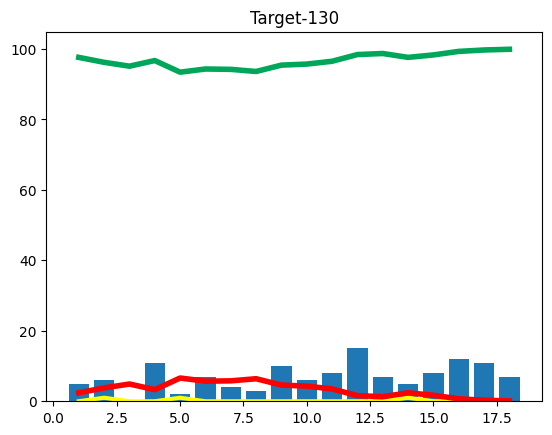

In [63]:
import matplotlib.pyplot as plt
# plt.figure(figsize=(18,8))
plt.plot(temp_df['end_of_over'],temp_df['wickets_in_over'],color='yellow',linewidth=3)
plt.plot(temp_df['end_of_over'],temp_df['win'],color='#00a65a',linewidth=4)
plt.plot(temp_df['end_of_over'],temp_df['lose'],color='red',linewidth=4)
plt.bar(temp_df['end_of_over'],temp_df['runs_after_over'])
plt.title('Target-' + str(target))

In [64]:
team_lst

['Rajasthan Royals',
 'Royal Challengers Bangalore',
 'Sunrisers Hyderabad',
 'Delhi Capitals',
 'Chennai Super Kings',
 'Gujarat Titans',
 'Lucknow Super Giants',
 'Kolkata Knight Riders',
 'Punjab Kings',
 'Mumbai Indians']

In [65]:
delevery_df['City'].unique()

array(['Ahmedabad', 'Kolkata', 'Mumbai', 'Navi Mumbai', 'Pune', 'Dubai',
       'Sharjah', 'Abu Dhabi', 'Delhi', 'Chennai', nan, 'Hyderabad',
       'Visakhapatnam', 'Bengaluru', 'Jaipur', 'Bangalore', 'Raipur',
       'Ranchi', 'Cuttack', 'Johannesburg', 'Centurion', 'Durban',
       'Bloemfontein', 'Port Elizabeth', 'Kimberley', 'East London',
       'Cape Town'], dtype=object)

In [66]:
import pickle
pickle.dump(pipe,open('pipe.pkl','wb'))